Step 1 — Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Step 2 — Load dataset

In [2]:
digits = load_digits()

X = digits.data      # features (1797, 64)
y = digits.target    # labels (0–9)

print("Shape of data:", X.shape)


Shape of data: (1797, 64)


Step 3 — Scale the features (very important for PCA)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 4 — Train/Test split (original data)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


Step 5 — Train Logistic Regression WITHOUT PCA

In [6]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy without PCA:", original_accuracy)


Accuracy without PCA: 0.9703703703703703


Step 6 — Apply PCA with 2 components

In [7]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

print("Explained Variance (2 components):",
      np.sum(pca_2.explained_variance_ratio_))


Explained Variance (2 components): 0.21594970500832794


Step 7 — Train model on PCA (2 components)

In [8]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca_2, y, test_size=0.3, random_state=42
)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)
print("Accuracy with 2 PCA components:",
      accuracy_score(y_test, y_pred))


Accuracy with 2 PCA components: 0.5425925925925926


Step 8 — Apply PCA with 10 components

In [9]:
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

print("Explained Variance (10 components):",
      np.sum(pca_10.explained_variance_ratio_))


Explained Variance (10 components): 0.5887375533730299


Step 9 — Train model on 10 components

In [10]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca_10, y, test_size=0.3, random_state=42
)

lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

print("Accuracy with 10 PCA components:",
      accuracy_score(y_test, y_pred))


Accuracy with 10 PCA components: 0.8796296296296297


Step 10 — PCA with 30 components

In [11]:
pca_30 = PCA(n_components=30)
X_pca_30 = pca_30.fit_transform(X_scaled)

print("Explained Variance (30 components):",
      np.sum(pca_30.explained_variance_ratio_))


Explained Variance (30 components): 0.893208438244957


Step 11 — Train model on 30 components

In [12]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca_30, y, test_size=0.3, random_state=42
)

lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

print("Accuracy with 30 PCA components:",
      accuracy_score(y_test, y_pred))


Accuracy with 30 PCA components: 0.9629629629629629


Step 12 — PCA with 50 components

In [13]:
pca_50 = PCA(n_components=50)
X_pca_50 = pca_50.fit_transform(X_scaled)

print("Explained Variance (50 components):",
      np.sum(pca_50.explained_variance_ratio_))


Explained Variance (50 components): 0.9827591946021531


Step 13 — Train model on 50 components

In [14]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca_50, y, test_size=0.3, random_state=42
)

lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

print("Accuracy with 50 PCA components:",
      accuracy_score(y_test, y_pred))


Accuracy with 50 PCA components: 0.9722222222222222


Step 14 — Plot cumulative explained variance (important)

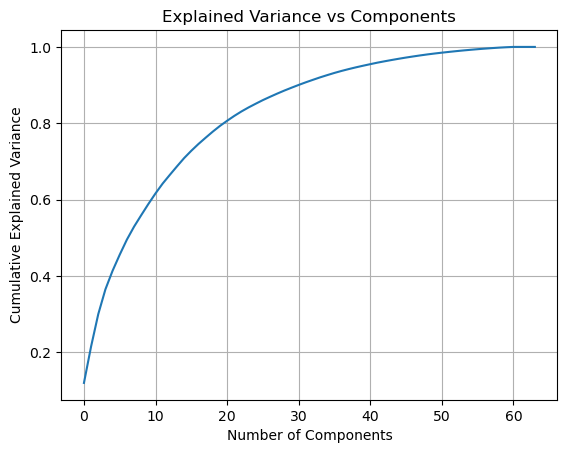

In [15]:
pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.grid()
plt.show()


Step 15 — 2D PCA visualization

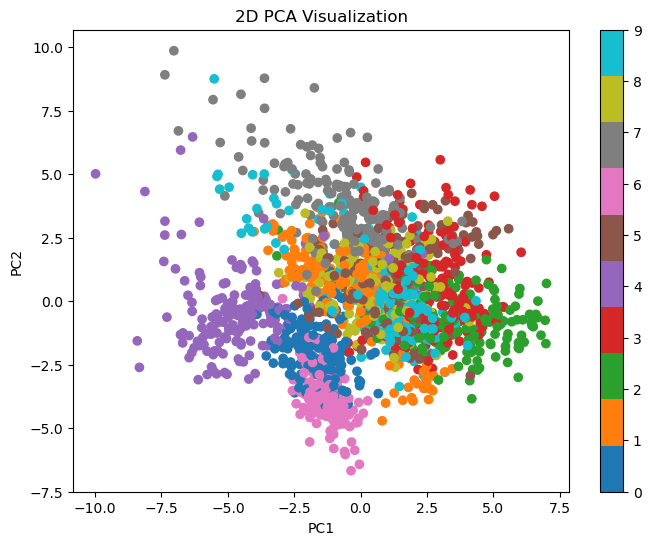

In [16]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10')
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Visualization")
plt.show()
